## Finding Happiness 

Greetings to all viewers. The purpose of this Jupyter Notebook is to attempt to find which measures correlate the most with a country's overall happiness rating. This rating of "happiness score" was determined by grouping together  https://www.kaggle.com/unsdsn/world-happiness.

Because the Happiness score is an aggregate of the other scores found in this study, my goal was to pull from other data sources to find a various amount of attributes that correlate with this Happiness score. 

In [188]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [189]:
happy2019 = pd.read_csv('2019.csv')

In [190]:
happy2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [191]:
happy2019.corr()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


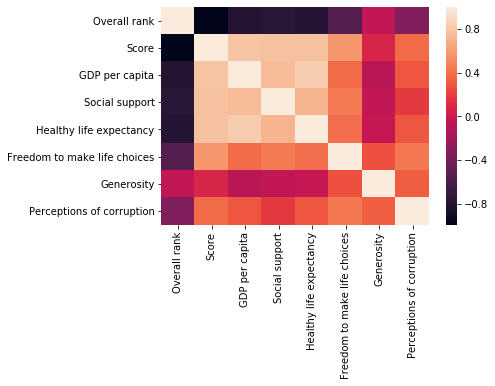

In [192]:
sns.heatmap(happy2019.corr())

In [193]:
happy2019.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [194]:
happy2019[['Overall rank', 'Score' , 'Country or region']].head(20)

,Overall rank,Score,Country or region
0,1,7.769,Finland
1,2,7.600,Denmark
2,3,7.554,Norway
3,4,7.494,Iceland
4,5,7.488,Netherlands
5,6,7.480,Switzerland
6,7,7.343,Sweden
7,8,7.307,New Zealand
8,9,7.278,Canada
9,10,7.246,Austria


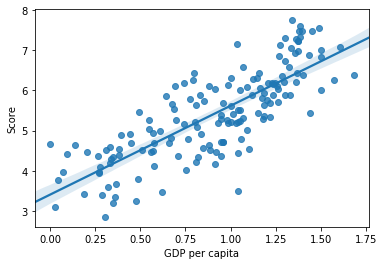

In [195]:
sns.regplot(x = 'GDP per capita', y='Score', data = happy2019)

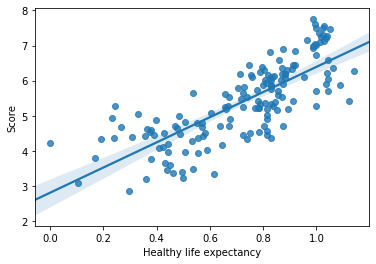

In [196]:
sns.regplot(x ='Healthy life expectancy' ,y='Score', data = happy2019)

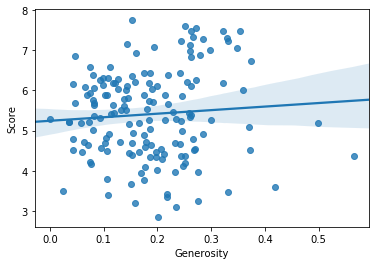

In [197]:
sns.regplot(x ='Generosity' ,y='Score', data = happy2019)

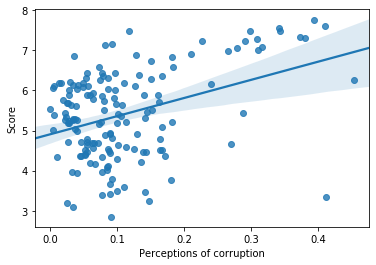

In [198]:
sns.regplot(x ='Perceptions of corruption' ,y='Score', data = happy2019)

In [199]:
ginidf = pd.read_csv('API_SI.POV.GINI_DS2_en_csv_v2_887268.csv', skiprows=4)

In [200]:
ginidf.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.3,NaN,NaN
3,Albania,ALB,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,29.0,NaN,34.6,32.9,33.7,33.2,NaN,NaN,NaN
4,Andorra,AND,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [201]:
len(ginidf.index)

264

In [202]:
len(happy2019.index)

156

In [203]:
ginidf.set_index('Country Name',inplace=True)

In [204]:
ginidf.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,AGO,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.3,NaN,NaN
Albania,ALB,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,29.0,NaN,34.6,32.9,33.7,33.2,NaN,NaN,NaN
Andorra,AND,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [205]:
ginidf.fillna(0,inplace = True)

In [206]:
#I want to transform my data so that I am only given the latest Gini coefficient as wella s the year that it was last updated.
#To do this I will create two new columns in the data frame. 
### One for each of the two above things that I stated I was lookiing for. 
# I honestly only want relatively recent data so if there is no Gini coefficient after 2009, then we'll just give them nans.
# I also have then (non) problem of having more gini index countries than ones with happiness data.
# Seeing as happiness is the thing that I care about the most I'm only going to pay attnetion to the countries in that data set.
latestyear = []
latestdata = []

for country, series in ginidf.iterrows():
    latest = False
    for year in range(-1,-11 ,-1):
        if series[year] > 0 and latest == False:
            latest = series[year]
            latestyear.append(ginidf.iloc[ :,year].name)
            latestdata.append(latest)
            
    if latest == False:
        latestyear.append(0)
        latestdata.append(0)
    print(country,ginidf.iloc[ :,year].name, latest)    
            
    
    

    # Select column contents by column name using [] operator
 #  if ginidf[column]columnSeriesObj = empDfObj[column]
  # print('Colunm Name : ', column)
   #print('Column Contents : ', columnSeriesObj.values)

Aruba 2011 False
Afghanistan 2011 False
Angola 2011 51.3
Albania 2011 33.2
Andorra 2011 False
Arab World 2011 False
United Arab Emirates 2011 32.5
Argentina 2011 41.4
Armenia 2011 34.4
American Samoa 2011 False
Antigua and Barbuda 2011 False
Australia 2011 34.4
Austria 2011 29.7
Azerbaijan 2011 False
Burundi 2011 38.6
Belgium 2011 27.4
Benin 2011 47.8
Burkina Faso 2011 35.3
Bangladesh 2011 32.4
Bulgaria 2011 40.4
Bahrain 2011 False
Bahamas, The 2011 False
Bosnia and Herzegovina 2011 33.0
Belarus 2011 25.2
Belize 2011 False
Bermuda 2011 False
Bolivia 2011 42.2
Brazil 2011 53.9
Barbados 2011 False
Brunei Darussalam 2011 False
Bhutan 2011 37.4
Botswana 2011 53.3
Central African Republic 2011 False
Canada 2011 33.8
Central Europe and the Baltics 2011 False
Switzerland 2011 32.7
Channel Islands 2011 False
Chile 2011 44.4
China 2011 38.5
Cote d'Ivoire 2011 41.5
Cameroon 2011 46.6
Congo, Dem. Rep. 2011 42.1
Congo, Rep. 2011 48.9
Colombia 2011 50.4
Comoros 2011 45.3
Cabo Verde 2011 42.4
Costa 

In [207]:
ginidf[ginidf['2019']>0]

#For some reason this data doesn't have any data for 2019 despite having a column for it.

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
Country Name,,,,,,,,,,,,,,,,,,,,,


In [208]:
ginidf['latest_gini_year'] = latestyear
ginidf['latest_gini_data'] = latestdata

In [209]:
ginidf

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64,latest_gini_year,latest_gini_data
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,GINI index (World Bank estimate),SI.POV.GINI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
Afghanistan,AFG,GINI index (World Bank estimate),SI.POV.GINI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
Angola,AGO,GINI index (World Bank estimate),SI.POV.GINI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,51.3,0.0,0.0,2018,51.3
Albania,ALB,GINI index (World Bank estimate),SI.POV.GINI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,34.6,32.9,33.7,33.2,0.0,0.0,0.0,2017,33.2
Andorra,AND,GINI index (World Bank estimate),SI.POV.GINI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
Arab World,ARB,GINI index (World Bank estimate),SI.POV.GINI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
United Arab Emirates,ARE,GINI index (World Bank estimate),SI.POV.GINI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,32.5,0.0,0.0,0.0,0.0,0.0,0.0,2014,32.5
Argentina,ARG,GINI index (World Bank estimate),SI.POV.GINI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,41.0,41.7,0.0,42.0,41.2,41.4,0.0,0.0,2018,41.4
Armenia,ARM,GINI index (World Bank estimate),SI.POV.GINI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30.6,31.5,32.4,32.5,33.6,34.4,0.0,0.0,2018,34.4


In [210]:
#Now that I have gathered the data that I want, I will now try to combine the gini data along with the happiness data. 
happy2019.rename(columns= {'Country or region': 'Country Name'}, inplace = True)
happy2019.set_index('Country Name',inplace=True)

In [211]:
freedomDF = pd.read_csv('FreedomScores.csv')

In [212]:
freedomDF.head() 

,Country/Territory,Region,C/T,Edition,Status,PR rating,CL rating,A1,A2,A3,...,F3,F4,F,G1,G2,G3,G4,G,CL,Total
0,Abkhazia,Eurasia,t,2020,PF,5,5,2,2,1,...,1,1,4,1,1,2,1,5,23,40
1,Afghanistan,Asia,c,2020,NF,5,6,1,1,1,...,0,1,2,0,1,0,1,2,14,27
2,Albania,Europe,c,2020,PF,3,3,3,3,2,...,2,3,9,3,2,2,2,9,40,67
3,Algeria,MENA,c,2020,NF,6,5,1,1,1,...,2,2,6,2,2,2,1,7,24,34
4,Andorra,Europe,c,2020,F,1,1,4,4,4,...,4,3,15,4,4,3,4,15,55,94


In [213]:
freedomDF.columns

Index(['Country/Territory', 'Region', 'C/T', 'Edition', 'Status', 'PR rating',
       'CL rating', 'A1', 'A2', 'A3', 'A', 'B1', 'B2', 'B3', 'B4', 'B', 'C1',
       'C2', 'C3', 'C', 'Add Q', 'Add A', 'PR', 'D1', 'D2', 'D3', 'D4', 'D',
       'E1', 'E2', 'E3', 'E', 'F1', 'F2', 'F3', 'F4', 'F', 'G1', 'G2', 'G3',
       'G4', 'G', 'CL', 'Total'],
      dtype='object')

In [214]:
freedomDF = freedomDF[['Country/Territory','Region','Status','PR','CL','Total']]

In [215]:
freedomDF.set_index('Country Name',inplace=True)

KeyError: 'Country Name'

In [ ]:
freedomDF.rename(columns={'PR':'Political Rights Rating',
                          'CL':'Civil Liberties Rating',
                          'Country/Territory':'Country Name'}, 
                 inplace=True)

In [ ]:
freedomDF.head()

In [ ]:
homicides = pd.read_csv('Copy of download.csv')

In [ ]:
homicides.head()

In [ ]:
homicides.set_index('Location',inplace =True)

In [ ]:
homicides = homicides['Value']

In [ ]:
homicides.head()

In [ ]:
finaldata = happy2019.join(ginidf)

In [ ]:
finaldata = finaldata.join(freedomDF)

In [ ]:
finaldata = finaldata.join(homicides)

In [ ]:
finaldata.drop(map(str,list(range(1960,2020))+['Unnamed: 64']), axis=1 , inplace = True)

In [ ]:
finaldata 

In [ ]:
finaldata = finaldata[finaldata['latest_gini_data']>0]

In [ ]:
finaldata = finaldata[['Score','latest_gini_year','latest_gini_data','Region','Status','Political Rights Rating','Civil Liberties Rating','Total']]

In [ ]:
finaldata.corr()

In [ ]:
finaldata.std(axis = 0)

In [ ]:
finaldata['Overall rank'].nunique()

In [ ]:
finaldata.info()

In [ ]:
finaldata.describe()

In [ ]:
sns.regplot(x= 'GDP per capita' , y = 'Social support' , data = finaldata[finaldata['GDP per capita'] > 1])

In [ ]:
sns.regplot(x= 'GDP per capita' , y = 'Social support' , data = finaldata[finaldata['GDP per capita'] < 1])

In [ ]:
sns.regplot(x= 'GDP per capita' , y = 'Social support' , data = finaldata , ci = 99)

In [ ]:
sns.regplot(x= 'GDP per capita' , y = 'Social support' , data = finaldata , ci = 95)